# EDA 

Will look at the combined & cleaned set of data [COMBINED-QUOTES.CSV](../DATA/COMBINED-QUOTES.csv)

Already did some cleaning on raw data, this NB is to look at other Text Specific Cleaning, PreProcessing or General Exploratory Analysis

- Team Added +45 Quotes (odd tokens were added in this, had to clean a bit)
- After generating embeddings, saved them Naively in a CSV (np.ndarrays), had to spend time finagling these into actual ndarrays (include this challenge in final write up)

In [ ]:
# Read in Data & Apply Prelim Transformations
import pandas as pd 
import numpy as np


# Function to Map String Saved to np.ndarrays
def stringToArray(df, col):
    converted_strings = []
    for se in df[col]:
        # Basic Cleaning of Text Data
        se = se.replace("\n", '').strip("[").strip("]") #basic cleaning of odd vals
        se = se.split()
        
        # Do Conversion
        se = np.array([se])
        se = se.astype(np.float) #numerical! 
        converted_strings.append(se)

    # ReWrite Column
    df[col] = converted_strings
    return df

# Read in Data w Embeddings Saved
df = pd.read_csv("../Data/Quotes+Embeddings.csv", engine="python") #after using BERT 
df = stringToArray(df, "embedding")

# Old Read in, prior to embedding generation
#df = pd.read_csv("../Data/COMBINED-QUOTES.csv", engine="python")
df["author"] = df["author"].str.lower() #Team Added Author Strings not LowerCase

df

,quote,author,embedding
0,age is an issue of mind over matter. if you do...,mark twain,"[[0.115264028, 0.212118551, 0.156775028, -0.25..."
1,"anyone who stops learning is old, whether at t...",henry ford,"[[-0.0289038979, 0.213069841, 0.207753137, -0...."
2,wrinkles should merely indicate where smiles h...,mark twain,"[[0.0432917289, -0.227921709, 0.0757735446, -0..."
3,true terror is to wake up one morning and disc...,kurt vonnegut,"[[0.12796618, -0.12819007, -0.0782715604, -0.0..."
4,a diplomat is a man who always remembers a wom...,robert frost,"[[-0.487012148, 0.141420722, 0.00562851038, -0..."
5,"as i grow older, i pay less attention to what ...",andrew carnegie,"[[0.315300196, 0.489572436, 0.0018894336, -0.1..."
6,how incessant and great are the ills with whic...,c. s. lewis,"[[-0.0439536609, 0.46629858, 0.25167954, -0.28..."
7,"old age, believe me, is a good and pleasant th...",confucius,"[[-0.313310325, 0.0575647652, 0.394260079, -0...."
8,old age has deformities enough of its own. it ...,eleanor roosevelt,"[[-0.0272223316, 0.298546851, 0.166340098, -0...."
9,nobody grows old merely by living a number of ...,samuel ullman,"[[0.360103995, 0.337920487, 0.3490915, -0.1188..."


In [ ]:
# Convert Saved Embeddings (str) to NP arrays -- Testing for `stringToArray` Func
import numpy as np 


se = df.loc[5, "embedding"]
print(type(se))

# Need Clean Str to get ndarray
se = se.replace("\n", '').strip("[").strip("]") #basic cleaning of odd vals
# se = ",".join(se.split()) #get rid of variable whitespace and get list of floats
se = se.split()

se = np.array([se])
se = se.astype(np.float)
se.shape #shape should be: (1, 768) 
# Linked Article Confirming- https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/


# Func wrote here originally, moved up
# stringToArray(df, "embedding")

<class 'str'>
Done!


In [ ]:
df["author"].value_counts()

henry david thoreau             141
ralph waldo emerson             137
friedrich nietzsche             121
albert einstein                 119
mahatma gandhi                  117
george bernard shaw             116
jerry saltz                     113
mitt romney                     109
oscar wilde                     106
benjamin franklin               103
mark twain                      100
francois de la rochefoucauld    100
thomas jefferson                100
aristotle                        97
plato                            97
barack obama                     95
voltaire                         92
marcus tullius cicero            88
benjamin disraeli                88
johann wolfgang von goethe       87
hillary clinton                  86
steve jobs                       86
william shakespeare              85
victor hugo                      85
lucius annaeus seneca            84
winston churchill                84
samuel johnson                   83
samuel butler               

#### Insights & Ideas

- 11,110 unique authors in this set (only 1,435 unique authors with more than 10 quotes)
- Based on distribution of data (num of quotes per num of individuals), we might get embeddings on whole set (including those with only 1 or few quotes) but then save the analysis of `PHILOSOPHERS` for a subset of individuals (based on number of quotes per person or pre-specified) that we filter from original data (after training)
- or build a Feature Vector (or Semantic Vector) for each Philosopher that describes them as compared to the rest of the dataset!


In [ ]:
df[df["author"].str.contains("toulouse-lautrec")]

df[df["author"].str.contains("musk")]

,quote,author
3260,"In the heat of our campaigns, we have all beco...",edmund s. muskie
8733,"Yeah, well I think anyone who likes fast cars ...",elon musk
55949,Silicon Valley has some of the smartest engine...,elon musk
61117,"When something is important enough, you do it ...",elon musk
61118,"Some people don't like change, but you need to...",elon musk
61119,Failure is an option here. If things are not f...,elon musk
61120,The path to the CEO's office should not be thr...,elon musk
61121,Persistence is very important. You should not ...,elon musk
61122,I think it's very important to have a feedback...,elon musk
61123,It's OK to have your eggs in one basket as lon...,elon musk


In [ ]:
# Look up a Quote based on Index

df.iloc[61068, 0]

'love is when the desire to be desired takes you so badly that you feel you could die of it.'

In [ ]:
# Filter data for number of quotes per Author

#df.groupby("author").filter(lambda x: len(x) > 10)

a = df.groupby("author").filter(lambda x: len(x) > 50)
a["author"].nunique()

70

In [ ]:
#df.groupby("author").filter(lambda x: len(x) > 50)["author"].nunique()
a = df.groupby("author").filter(lambda x: len(x) > 30)
a[a["author"].str.contains("sun")]


,quote,author


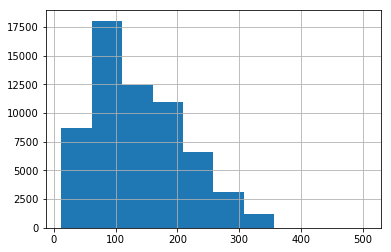

In [ ]:
# What is Max len of a quote? - 505 tokens, most drop off at about 250!
df["quote_len"] = df["quote"].str.len()

df["quote_len"].value_counts()
df["quote_len"].hist()


## Merge Quotes df with Manually Labelled Philosophers df

Check out distribution of Quotes for Selected Categories

In [ ]:
# Read in & Get Basic Insights

pdf = pd.read_csv("../Data/philosophers.csv")
pdf.rename(columns={"name":"author"}, inplace=True)
pdf["author"] = pdf["author"].str.lower()
pdf["hemisphere"].value_counts()

Western    35
Eastern    14
Name: hemisphere, dtype: int64

In [ ]:
# Get List of Celebrities (remove from East vs. West Philosopher comparisions)
pdf[pdf["hemisphere"]=="Western"] 

celebs = ["Musk" , "Jobs" , "Trump" , "Winfrey" , "Einstein"]

# Exclude Celebs
for c in celebs:
    pdf = pdf[~pdf["author"].str.contains(c)]

pdf["hemisphere"].value_counts()


Western    35
Eastern    14
Name: hemisphere, dtype: int64

Celebrities to remove from East Vs. West Analysis
- Elon Musk
- Steve Jobs
- Donald Trump
- Oprah Winfrey
- Albert Einstein



In [ ]:
pdf["author"].nunique()
cdf["author"].nunique()

pdf["author"].unique()


array(['albert camus', 'albert einstein', 'aldous huxley',
       'alexsandr solzhenitsyn', 'aristotle', 'arthur shopenhauer',
       'elon musk', 'ayn rand', 'carl jung', 'charles bukowski',
       'siddhartha gautama', 'confucius', 'diogenes', 'epictetus',
       'franz kafka', 'friedrich nietzsche', 'fyodor dostoyevsky',
       'galileo galilei', 'henry david thoreau', 'hunter thompson',
       'jean-paul sartre', 'jiddu krishnamurti', 'john locke',
       'jordan peterson', 'kabir', 'lao tzu', 'mahatma ghandi',
       'marcus aurelius', 'milton friedman', 'miyamoto musashi',
       'niccolo machiaveli', 'plato', 'rabindranath tagore',
       'robert frost', 'rumi', 'seneca', 'socrates', 'soren kierkegaard',
       'sun tzu', 'victor frankl', 'voltaire', 'zhuang zhou',
       'pythagoras', 'heracleitus', 'democritus', 'nagajuna',
       'oprah winfrey', 'donald trump', 'steve jobs'], dtype=object)

In [ ]:
df[df["author"].str.contains("naga")]

,quote,author,embedding
3065,"although you may spend your life killing, you ...",nagarjuna,"[[0.183576018, 0.2003607, -0.0404632688, 0.039..."
36414,"if you desire ease, forsake learning.",nagarjuna,"[[-0.0209716987, 0.320014864, 0.0609314181, -0..."


In [ ]:
# Join PDF on DF -- match our labeled set with their quotes!

cdf = pdf.merge(df, on="author", how="inner") #returns 1586 Quotes/Embeddings for our labeled set of 49 Notables
cdf['author'].unique()

array(['albert camus', 'albert einstein', 'aldous huxley',
       'aleksandr solzhenitsyn', 'aristotle', 'arthur schopenhauer',
       'elon musk', 'ayn rand', 'carl jung', 'charles bukowski',
       'confucius', 'diogenes', 'epictetus', 'franz kafka',
       'friedrich nietzsche', 'fyodor dostoevsky', 'galileo galilei',
       'henry david thoreau', 'hunter s. thompson', 'jean-paul sartre',
       'jiddu krishnamurti', 'john locke', 'lao tzu', 'marcus aurelius',
       'milton friedman', 'miyamoto musashi', 'niccolo machiavelli',
       'plato', 'rabindranath tagore', 'robert frost', 'rumi', 'seneca',
       'socrates', 'soren kierkegaard', 'sun tzu', 'viktor e. frankl',
       'voltaire', 'zhuangzi', 'pythagoras', 'heraclitus', 'democritus',
       'nagarjuna', 'oprah winfrey', 'donald trump', 'steve jobs'],
      dtype=object)

In [ ]:
# Not all Authors copied over in join -- mispelled names
pdf

df[df["author"].str.contains("alexsandr solzhenitsyn")]

df["author"].replace(
        to_replace="alexsandr solzhenitsyn",
        value="solzhenitsyn",
        inplace=True
                            )

#df.loc[df['author'].isin(['alexsandr solzhenitsyn'])] = 'solzhenitsyn'

df[df["author"].str.contains("solzhenitsyn")]




In [ ]:
# Write out for later read in 

cdf.to_csv("../Data/LabeledAuthors+Embeddings.csv", index=False)

## Misc Filters

Investigate different aspects of `cdf`

In [ ]:
# cdf for Specific Author
cdf[cdf["author"]=="miyamoto musashi"]

In [ ]:
# Count of Quotes per Hemisphere

print("# of Western Quotes", cdf[cdf["hemisphere"]=="Western"].shape[0])
print("# of Eastern Quotes", cdf[cdf["hemisphere"]=="Eastern"].shape[0])


# of Western Quotes 1412
# of Eastern Quotes 174


In [ ]:
# View Distributions of Quotes by Era & Hemisphere

cdf["era"].value_counts()
cdf.groupby(by=["era", "hemisphere"], axis=0).count() #filter out eras for East Vs. West TSNE comparison?

author  quote  embedding
era            hemisphere                          
Ancient        Eastern        118    118        118
               Western        328    328        328
Contemporary   Eastern         35     35         35
               Western        213    213        213
Early Modern   Eastern          2      2          2
               Western        243    243        243
Late Modern    Eastern         15     15         15
               Western        628    628        628
Post-Classical Eastern          4      4          4

for the hemisphere analysis/graph, do not include the following eras (skew the heck out of our dists)
- Late Modern
- Early Modern

In [ ]:
# Filter out Western Predominant Eras

eras_filtered = cdf[~cdf["era"].isin(["Late Modern", "Early Modern"])] #returns ['Ancient', 'Contemporary', 'Post-Classical'] eras only! 


array(['Ancient', 'Contemporary', 'Post-Classical'], dtype=object)